In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
t_u

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

Shuffled indices and create train / val set (efficiency way ?)

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
print(n_samples)
print(n_val)

shuffled_indices = torch.randperm(n_samples)
print(shuffled_indices)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

11
2
tensor([10,  4,  1,  0,  8,  6,  9,  2,  7,  3,  5])


(tensor([10,  4,  1,  0,  8,  6,  9,  2,  7]), tensor([3, 5]))

In [5]:
t_u_train = t_u[train_indices] # X_train
t_c_train = t_c[train_indices] # y_train

t_u_val = t_u[val_indices] # X_val
t_c_val = t_c[val_indices] # y_val

Normalize input

In [6]:
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [7]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [8]:
t_un_val

tensor([[8.1900],
        [4.8900]])

In [9]:
linear_model(t_un_val)

tensor([[4.0960],
        [2.1992]], grad_fn=<AddmmBackward>)

In [10]:
linear_model.weight

Parameter containing:
tensor([[0.5748]], requires_grad=True)

In [11]:
linear_model.bias

Parameter containing:
tensor([-0.6115], requires_grad=True)

In [12]:
x = torch.ones(1)
x

tensor([1.])

In [13]:

linear_model(x)

tensor([-0.0367], grad_fn=<AddBackward0>)

In [14]:
x = torch.ones(10, 1)
x

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [15]:

linear_model(x)

tensor([[-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367],
        [-0.0367]], grad_fn=<AddmmBackward>)

In [16]:
linear_model = nn.Linear(1, 1) # <1>
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [17]:
linear_model.parameters()

<generator object Module.parameters at 0x7f55e3c5ba98>

In [18]:

optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [19]:
linear_model.parameters()

<generator object Module.parameters at 0x7f562e394a40>

In [20]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.0906]], requires_grad=True), Parameter containing:
 tensor([0.7018], requires_grad=True)]

In [21]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [22]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 236.1168, Validation loss 667.1441
Epoch 1000, Training loss 4.2144, Validation loss 9.5129
Epoch 2000, Training loss 3.2077, Validation loss 3.9031
Epoch 3000, Training loss 3.1602, Validation loss 3.0191

Parameter containing:
tensor([[5.0934]], requires_grad=True)
Parameter containing:
tensor([-15.9982], requires_grad=True)


In [23]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 205.7362, Validation loss 604.8312
Epoch 1000, Training loss 4.3064, Validation loss 9.8909
Epoch 2000, Training loss 3.2120, Validation loss 3.9547
Epoch 3000, Training loss 3.1604, Validation loss 3.0288

Parameter containing:
tensor([[5.0921]], requires_grad=True)
Parameter containing:
tensor([-15.9909], requires_grad=True)


In [31]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [32]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [33]:
for name,param in seq_model.named_parameters():
  print(name,param)

0.weight Parameter containing:
tensor([[-0.5343],
        [ 0.4832],
        [ 0.0090],
        [ 0.6498],
        [ 0.2978],
        [-0.8218],
        [ 0.2097],
        [-0.5575],
        [-0.7936],
        [-0.5869],
        [-0.3022],
        [-0.1506],
        [-0.4298]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.6925,  0.9252, -0.5942, -0.1379, -0.7643, -0.3684,  0.9734,
         0.3937,  0.2556, -0.8435,  0.8672,  0.2626,  0.2313],
       requires_grad=True)
2.weight Parameter containing:
tensor([[-0.0316, -0.2679,  0.1318,  0.1012,  0.2747,  0.1555, -0.2426,
          0.1906, -0.0348, -0.1221, -0.1624, -0.1799, -0.0300]],
       requires_grad=True)
2.bias Parameter containing:
tensor([-0.0537], requires_grad=True)


In [27]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [28]:
seq_model = nn.Sequential(
            nn.Linear(2, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 3)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=2, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=3, bias=True)
)

In [29]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 2])
0.bias torch.Size([13])
2.weight torch.Size([3, 13])
2.bias torch.Size([3])


In [30]:
for name, param in seq_model.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 0.0360,  0.4464],
        [-0.6360,  0.5676],
        [ 0.6595,  0.6822],
        [-0.5849,  0.3617],
        [-0.3244, -0.5055],
        [ 0.1098, -0.2041],
        [ 0.2160, -0.0240],
        [-0.2529,  0.4311],
        [-0.0726,  0.3453],
        [-0.5125,  0.5434],
        [ 0.5118,  0.1598],
        [-0.1864,  0.3616],
        [ 0.6097,  0.6114]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.2667,  0.3350,  0.3862,  0.2085, -0.2240,  0.1362,  0.1011,
         0.3063,  0.0019,  0.4141, -0.1121, -0.4885,  0.5891],
       requires_grad=True)
2.weight Parameter containing:
tensor([[-0.2256,  0.1184, -0.1238,  0.2086, -0.1261,  0.1287,  0.2659,
         -0.0437, -0.2654,  0.2048,  0.2527,  0.0043,  0.1849],
        [-0.0595,  0.2733,  0.1653, -0.2593,  0.2648, -0.2040,  0.2201,
         -0.2551,  0.0209,  0.2740,  0.0819, -0.0354,  0.2263],
        [ 0.1414, -0.1665,  0.1688,  0.2481, -0.1217,  0.2328,  0.1634,
         -0.0006,  

In [31]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [32]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [33]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.0666], requires_grad=True)

In [34]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 168.5923, Validation loss 209.0068
Epoch 1000, Training loss 6.0705, Validation loss 3.8531
Epoch 2000, Training loss 3.9766, Validation loss 1.4481
Epoch 3000, Training loss 2.1722, Validation loss 1.4434
Epoch 4000, Training loss 1.8676, Validation loss 2.3160
Epoch 5000, Training loss 1.8046, Validation loss 2.4530
output tensor([[20.6486],
        [ 2.6870]], grad_fn=<AddmmBackward>)
answer tensor([[21.0000],
        [ 0.5000]])
hidden tensor([[ 0.0026],
        [-0.0021],
        [-0.0525],
        [-0.0033],
        [-0.0351],
        [-0.0001],
        [-0.0077],
        [ 0.0181]])


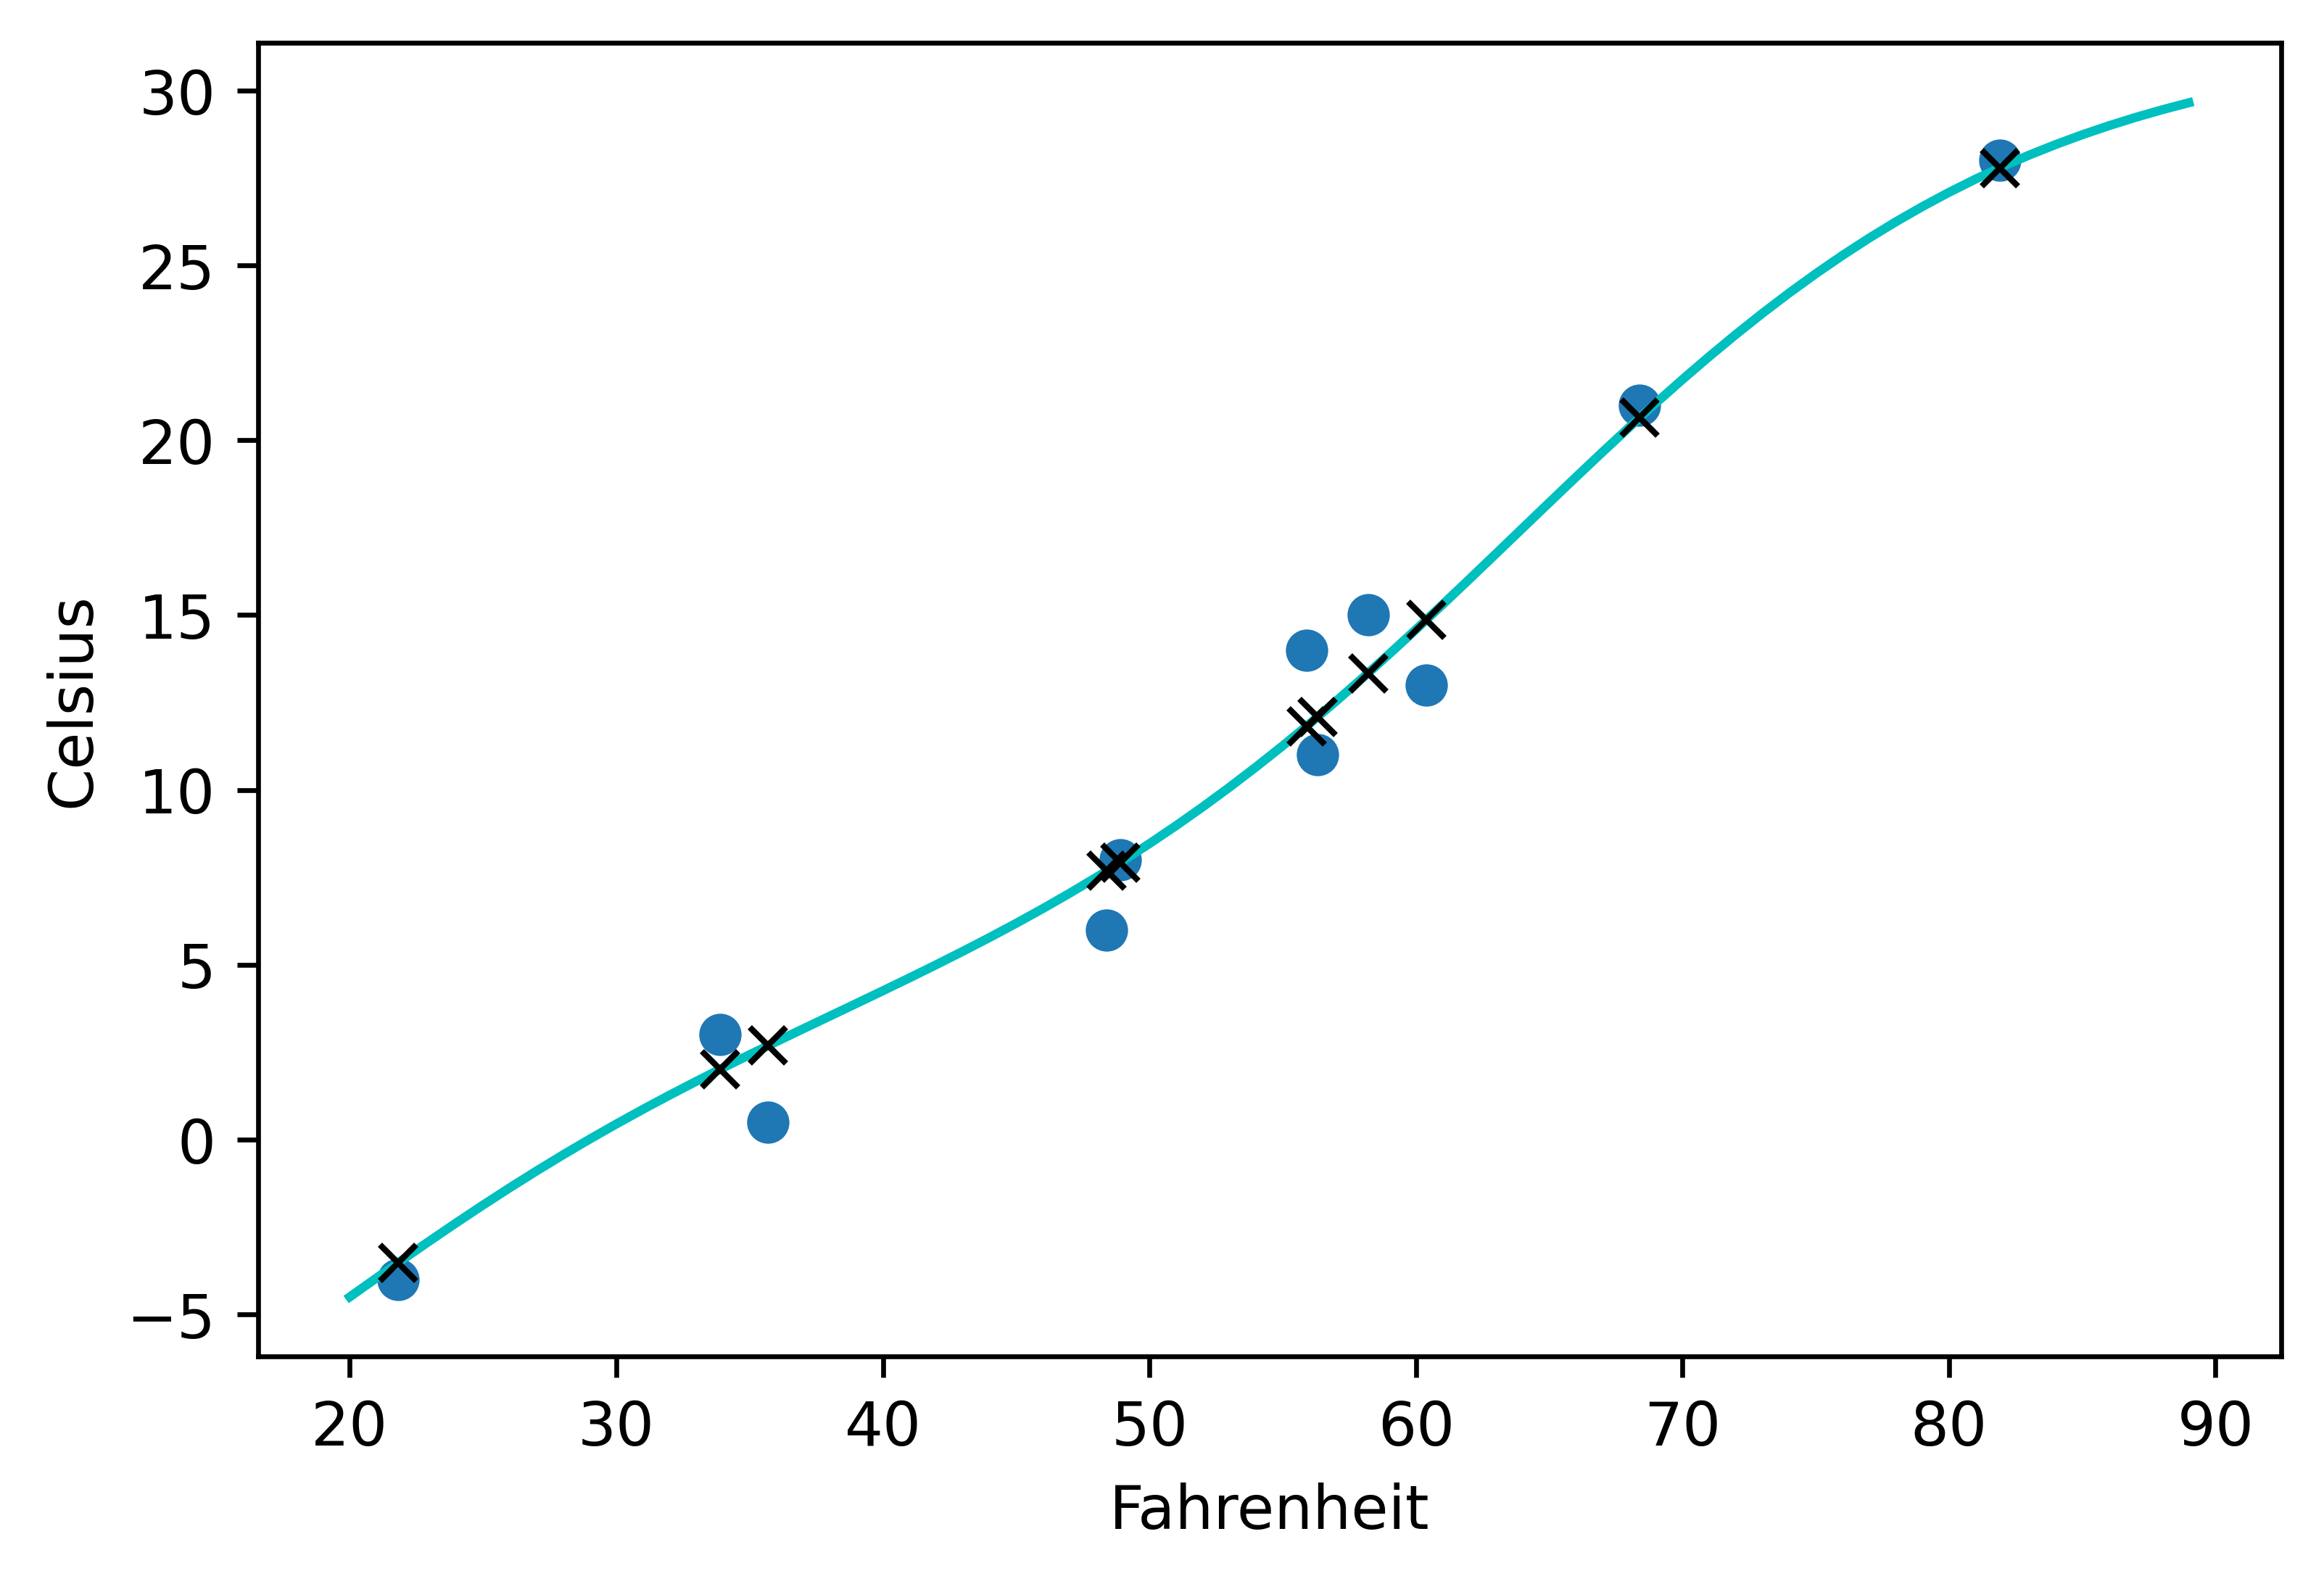

In [35]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 167.9533, Validation loss 208.2498
Epoch 1000, Training loss 50.8231, Validation loss 79.8687
Epoch 2000, Training loss 37.2823, Validation loss 59.1703
Epoch 3000, Training loss 25.5405, Validation loss 40.1606
Epoch 4000, Training loss 16.6218, Validation loss 24.6681
Epoch 5000, Training loss 11.2756, Validation loss 15.1006


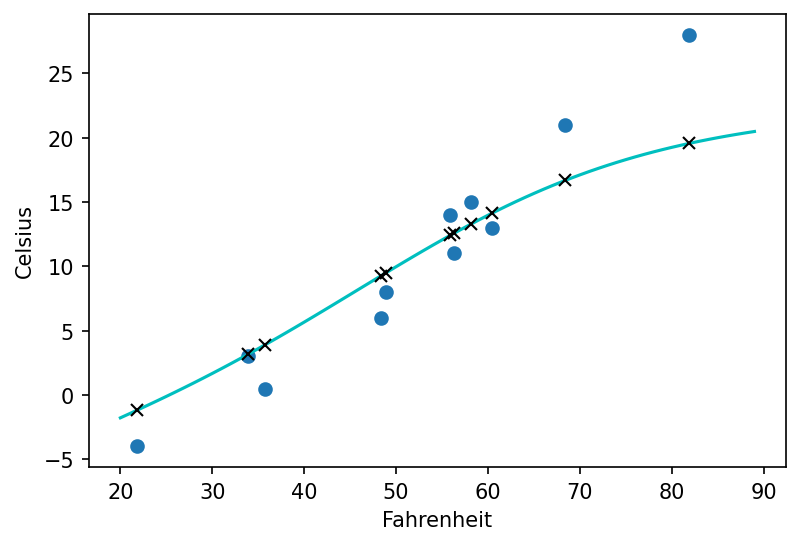

In [36]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
